<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Talleres/Taller2_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUNTO 1
Generar un subset de imágenes mnist con ruido blanco Gaussiano. Luego crear y_train2 y y_test2 con solo 2 clases:

Si el numero es <5 --> 0; si el numero es >=5 --> 1

La red funcional debe tener 2 entradas (imagen, imagen con ruido) y 2 salidas (número de la imagen, su parte binaria -reconociendo si es menor o mayor a 5)

In [172]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [58]:
def noisy_images(x_train, x_test):
  """
  Esta función toma los datos de train y test
  y genera otro dataset con imágenes ruidosas.
  Entrada: Conjunto de train y test original
  Salida: Conjunto de train y test ruidoso
  """
  desv = 0.1     #Desviación estándar del ruido

  ruido = np.random.normal(0, desv, x_train.shape)
  ruido2 = np.random.normal(0, desv, x_test.shape)

  train = np.clip(x_train + ruido, 0, 1)
  test = np.clip(x_test + ruido2, 0, 1)
  return train, test

def binary_label(y_train, y_test):
  """
  Esta función toma las etiquetas de train y test
  y genera otras etiquetas para clasificación
  binaria.
  Entrada: Conjunto de etiquetas originales
  Salida: Etiquetas binarias
  """
  y_train2 = np.where(y_train < 5, 0, 1)
  y_test2 = np.where(y_test < 5, 0, 1)
  return y_train2, y_test2

In [56]:
# Carga de códigos previamente entrenados
!git clone https://github.com/FelipeFerAl/ImageProcessing.git

Cloning into 'ImageProcessing'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 132 (delta 54), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 54.98 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [59]:
# Carga de la base de datos original
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización de los datos
x_train = x_train/255
x_test = x_test/255

# Creación de los datasets de imágenes con ruido
x_train2, x_test2 = noisy_images(x_train, x_test)

# Creación de las etiquetas binarias
y_train2, y_test2 = binary_label(y_train, y_test)

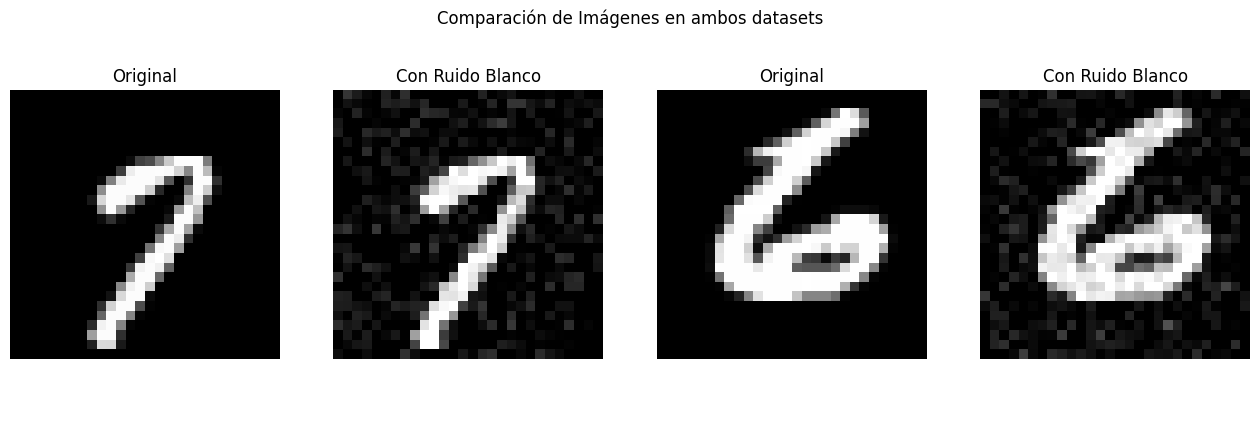

In [60]:
idx = 9999
plt.figure(figsize=(16,5)), plt.title('Comparación de Imágenes en ambos datasets'), plt.axis("off")
plt.subplot(1,4,1), plt.imshow(x_train[idx], cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,2), plt.imshow(x_train2[idx], cmap="gray"), plt.title("Con Ruido Blanco"), plt.axis("off")
plt.subplot(1,4,3), plt.imshow(x_test[idx], cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,4), plt.imshow(x_test2[idx], cmap="gray"), plt.title("Con Ruido Blanco"), plt.axis("off")
plt.show()

In [61]:
# Prueba de las etiquetas
idxs = [435,678,1269,6407]
for idx in idxs:
  print(f"Etiqueta Original: {y_test[idx]} ; Etiqueta Binaria: {y_test2[idx]}")

Etiqueta Original: 8 ; Etiqueta Binaria: 1
Etiqueta Original: 9 ; Etiqueta Binaria: 1
Etiqueta Original: 2 ; Etiqueta Binaria: 0
Etiqueta Original: 1 ; Etiqueta Binaria: 0


CÓDIGO DE LA RED FUNCIONAL

In [62]:
input_1 = tf.keras.layers.Input(shape=(28,28))
input_2 = tf.keras.layers.Input(shape=(28,28))

fusion = tf.keras.layers.Concatenate()([input_1, input_2])
plano = tf.keras.layers.Flatten()(fusion)

linea1 = tf.keras.layers.Dense(128, activation='relu')(plano)
linea2 = tf.keras.layers.Dense(64, activation='relu')(linea1)

output1 = tf.keras.layers.Dense(10, activation='softmax')(linea2)
output2 = tf.keras.layers.Dense(1, activation='sigmoid')(linea2)

model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output1, output2])
model.compile(optimizer='adam',
              loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
              metrics=['accuracy', 'accuracy'])

In [63]:
# model.fit([x_train, x_train2], [y_train, y_train2], epochs=10, validation_data=([x_test, x_test2], [y_test, y_test2]))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - dense_41_accuracy: 0.8819 - dense_41_loss: 0.3932 - dense_42_accuracy: 0.9133 - dense_42_loss: 0.2090 - loss: 0.6022 - val_dense_41_accuracy: 0.9547 - val_dense_41_loss: 0.1445 - val_dense_42_accuracy: 0.9719 - val_dense_42_loss: 0.0847 - val_loss: 0.2295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - dense_41_accuracy: 0.9677 - dense_41_loss: 0.1079 - dense_42_accuracy: 0.9795 - dense_42_loss: 0.0612 - loss: 0.1691 - val_dense_41_accuracy: 0.9689 - val_dense_41_loss: 0.1013 - val_dense_42_accuracy: 0.9758 - val_dense_42_loss: 0.0722 - val_loss: 0.1737
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - dense_41_accuracy: 0.9793 - dense_41_loss: 0.0694 - dense_42_accuracy: 0.9849 - dense_42_loss: 0.0428 - loss: 0.1122 - val_dense_41_accuracy: 0.9727 - val_dense_41_loss: 0.0910 - val_dense_42_accuracy: 0.9820 - val_dense_42_loss: 0.0553 - val_loss: 0.1465
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - dens

In [64]:
y_pred1, y_pred2 = model.predict([x_test, x_test2])

y_pred1 = np.argmax(y_pred1, axis=1)
y_pred2 = np.round(y_pred2).astype(int)

for idx in idxs:
  if y_pred2[idx] == 0:
    text = "Menor a 5"
  else:
    text = "5 o Mayor"
  print(f"Etiquetas - Real: {y_test[idx]} ; Predicha: {y_pred1[idx]}; Binaria: {text}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Etiquetas - Real: 8 ; Predicha: 8; Binaria: 5 o Mayor
Etiquetas - Real: 9 ; Predicha: 9; Binaria: 5 o Mayor
Etiquetas - Real: 2 ; Predicha: 2; Binaria: Menor a 5
Etiquetas - Real: 1 ; Predicha: 1; Binaria: Menor a 5


In [72]:
accurate = 0
accurate2 = 0
for i in range(len(y_pred1)):
  if y_test[i] == y_pred1[i]:
    accurate += 1
  if y_test2[i] == y_pred2[i]:
    accurate2 += 1
print(f"La precisión del modelo para clasificación numérica: {(accurate/len(y_pred1))*100}")
print(f"La precisión del modelo para clasificación binaria: {(accurate2/len(y_pred2))*100}")

La precisión del modelo para clasificación numérica: 97.39
La precisión del modelo para clasificación binaria: 98.11


In [66]:
# model.save('modelo_mnist.keras')

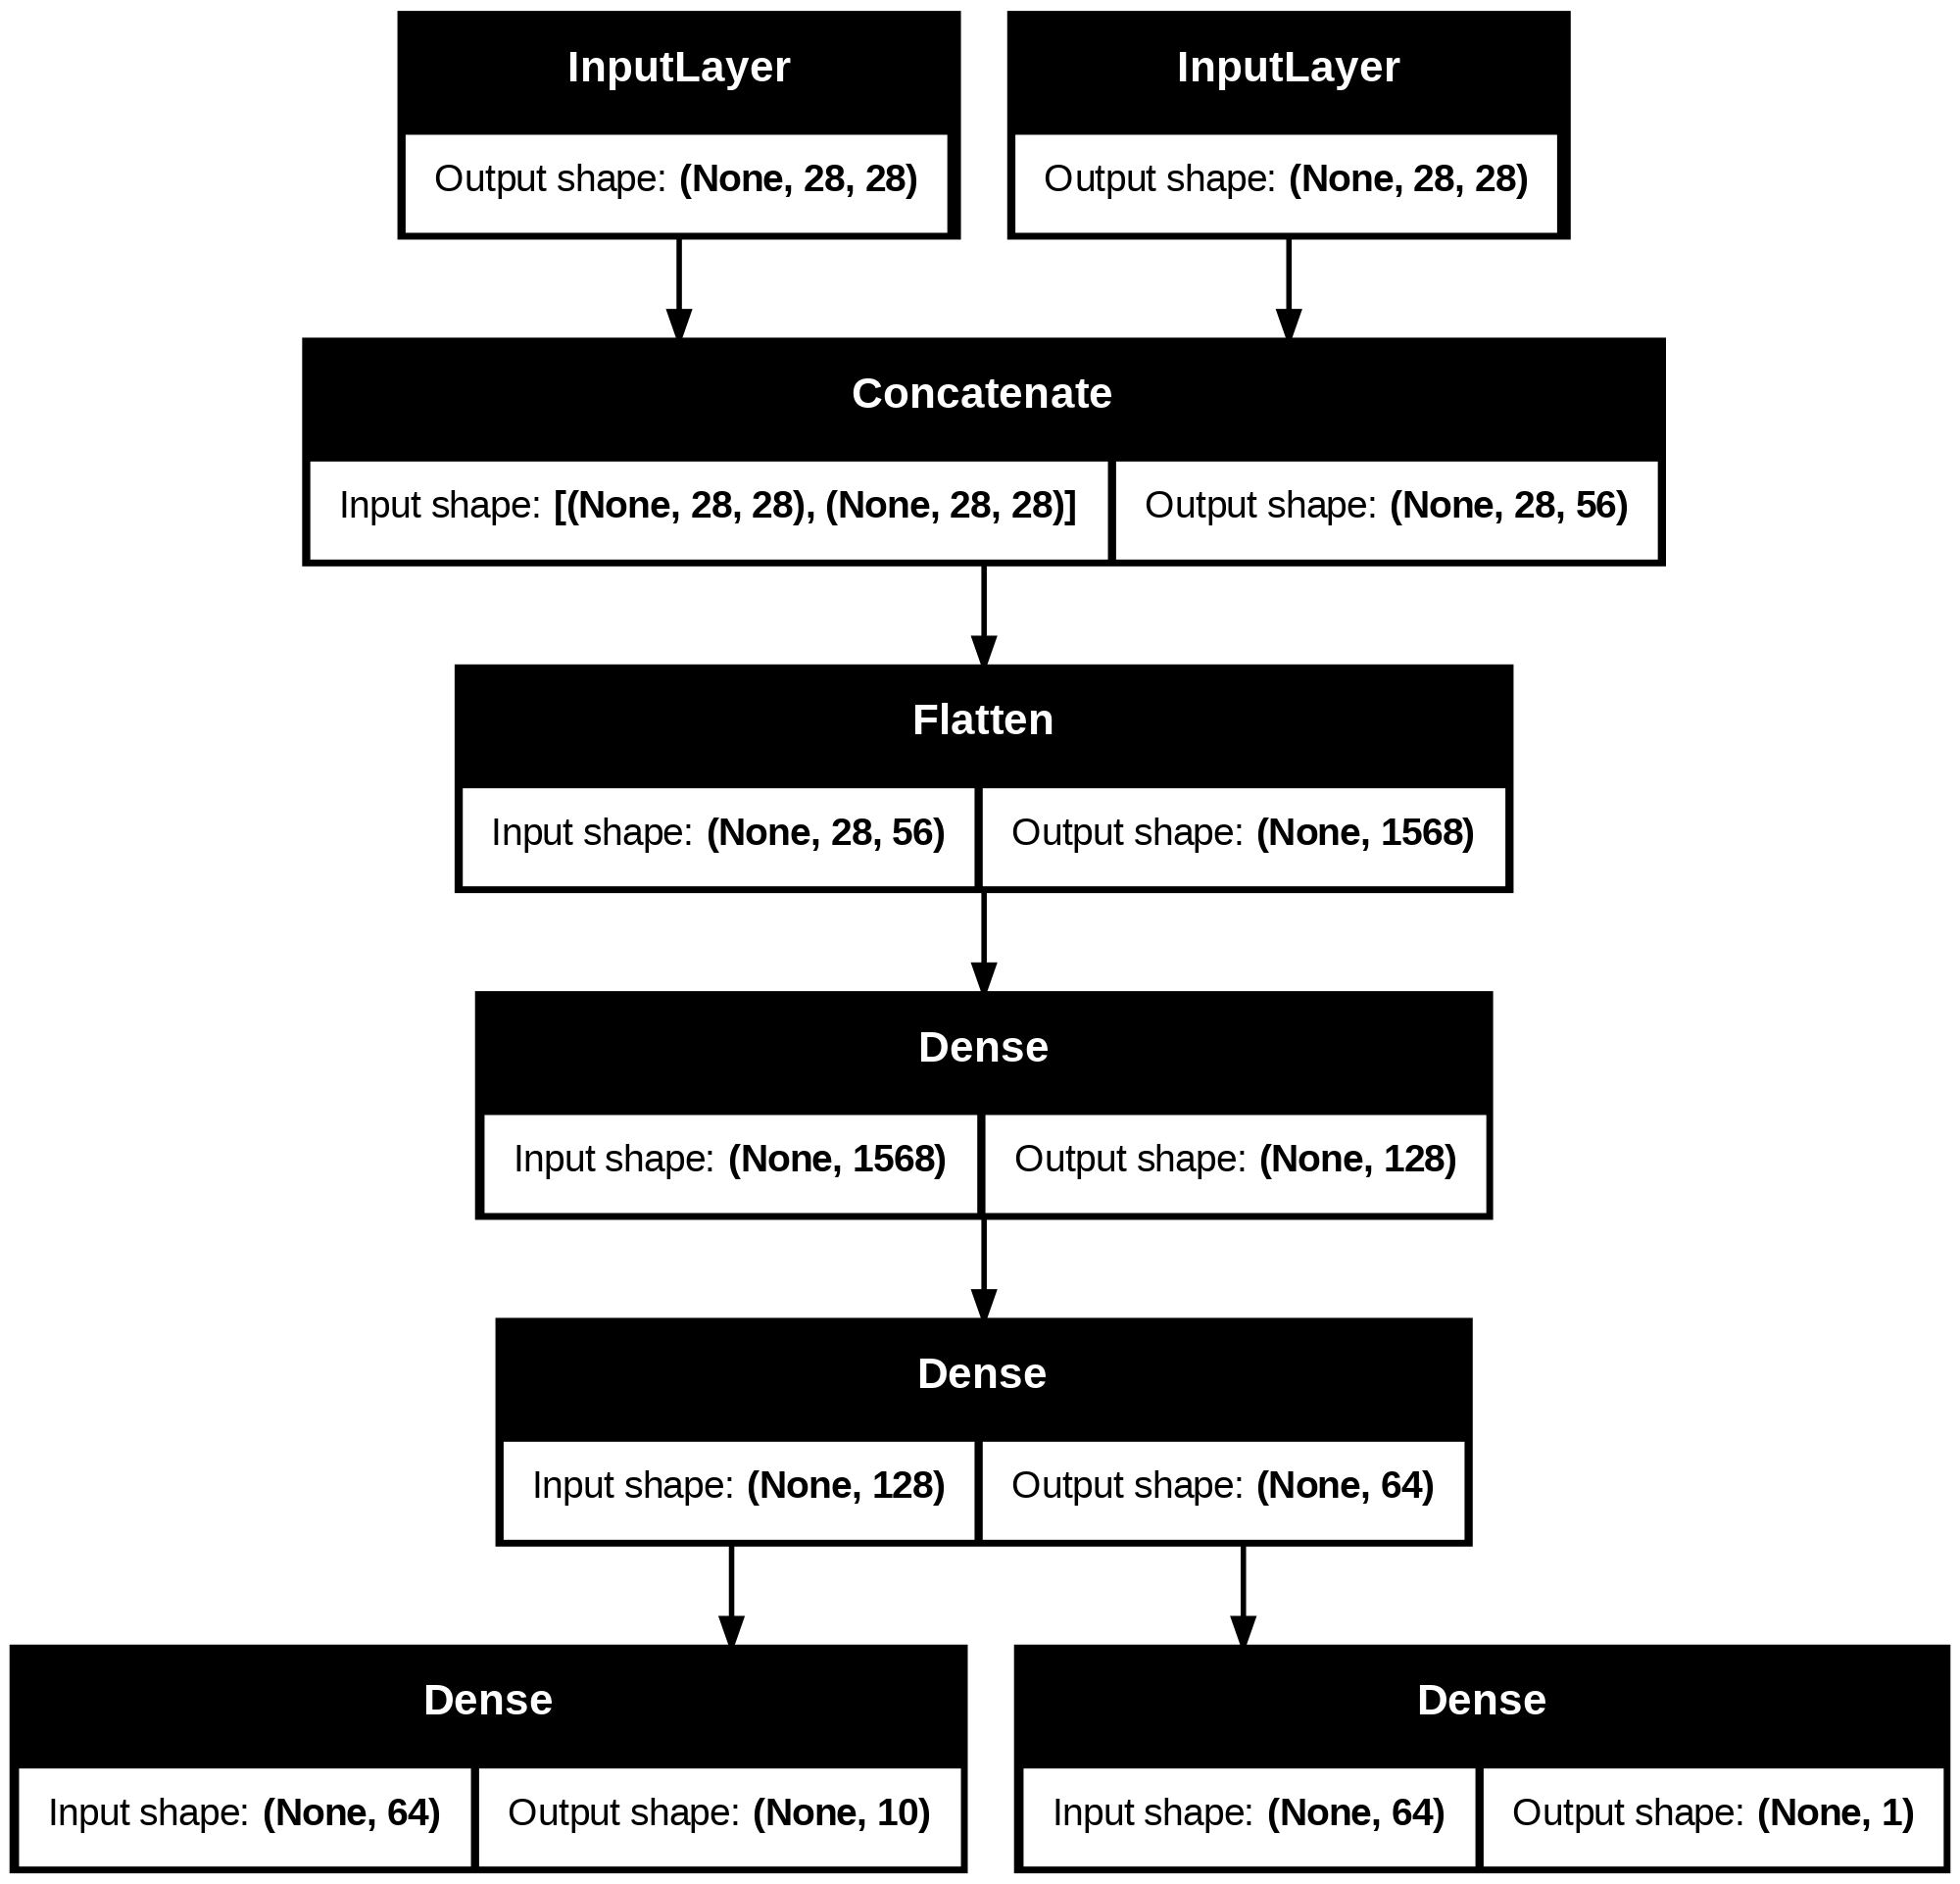

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Punto 2
Diseñar un modelo funcional para las bases Fashion Mnist, Cifar10 y Cifar100

**Fashion Mnist**

In [2]:
# Carga de los datos y Normalización
(x_train, y_train_fm), (x_test, y_test_fm) = tf.keras.datasets.fashion_mnist.load_data()

x_train_fm = x_train/255
x_test_fm = x_test/255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


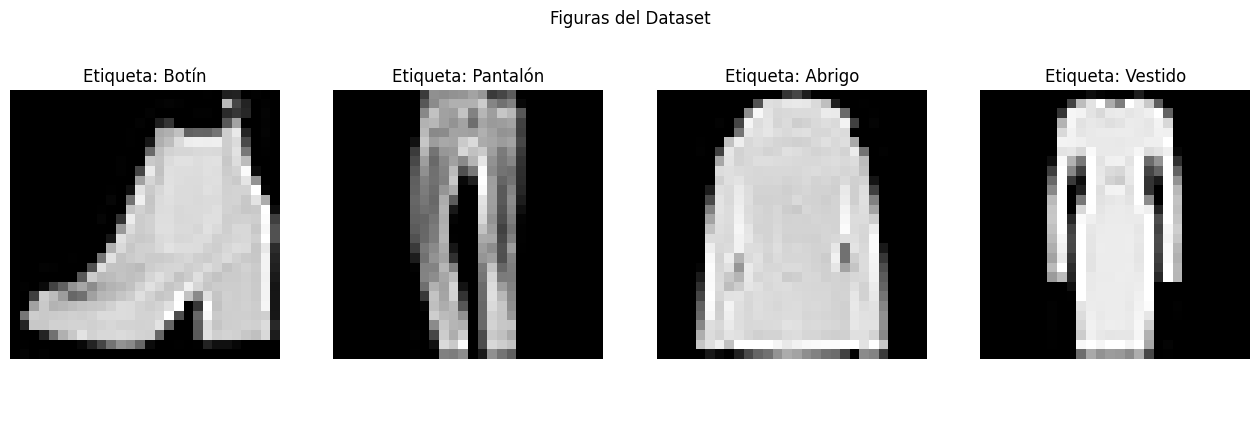

In [67]:
# Etiquetas en la base de datos
labels = ['Camiseta','Pantalón','Suéter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla','Bolso','Botín']

idxs2 = [800,1500,2000,2500]
plt.figure(figsize=(16,5)), plt.title('Figuras del Dataset'), plt.axis('off')
for idx in idxs2:
  plt.subplot(1,4,idxs2.index(idx)+1)
  plt.imshow(x_train_fm[idx], cmap="gray"), plt.title(f"Etiqueta: {labels[y_train_fm[idx]]}"), plt.axis('off')
plt.show()

In [68]:
input_fm = tf.keras.layers.Input(shape=(28,28))
A1 = tf.keras.layers.Flatten()(input_fm)
A2 = tf.keras.layers.Dense(512, activation='relu')(A1)
A3 = tf.keras.layers.Dense(128, activation='relu')(A2)
A4 = tf.keras.layers.Dense(32, activation='relu')(A3)
output_fm = tf.keras.layers.Dense(10, activation='softmax')(A4)

model_fm = tf.keras.Model(inputs=input_fm, outputs=output_fm)
model_fm.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'],)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7641 - loss: 0.6706 - val_accuracy: 0.8499 - val_loss: 0.4199
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8593 - loss: 0.3804 - val_accuracy: 0.8634 - val_loss: 0.3765
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8753 - loss: 0.3369 - val_accuracy: 0.8648 - val_loss: 0.3799
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8823 - loss: 0.3165 - val_accuracy: 0.8773 - val_loss: 0.3361
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8892 - loss: 0.2961 - val_accuracy: 0.8787 - val_loss: 0.3447
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.8955 - loss: 0.2759 - val_accuracy: 0.8857 - val_loss: 0.3277
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8997 - loss: 0.2661 - val_accuracy: 0.8850 - val_loss: 0.3217
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9051 -

In [ ]:
model_fm.fit(x_train_fm, y_train_fm, epochs=10, validation_split=0.3)

In [91]:
y_pred_fm = model_fm.predict(x_test_fm)

y_pred_fm = np.argmax(y_pred_fm, axis=1)

accurate = 0
for i in range(len(y_pred_fm)):
  if y_test_fm[i] == y_pred_fm[i]:
    accurate += 1
print(f"La precisión del modelo es: {(accurate/len(y_pred_fm))*100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
La precisión del modelo es: 87.37%


In [70]:
# model.save('modelo_fashion_mnist.keras')

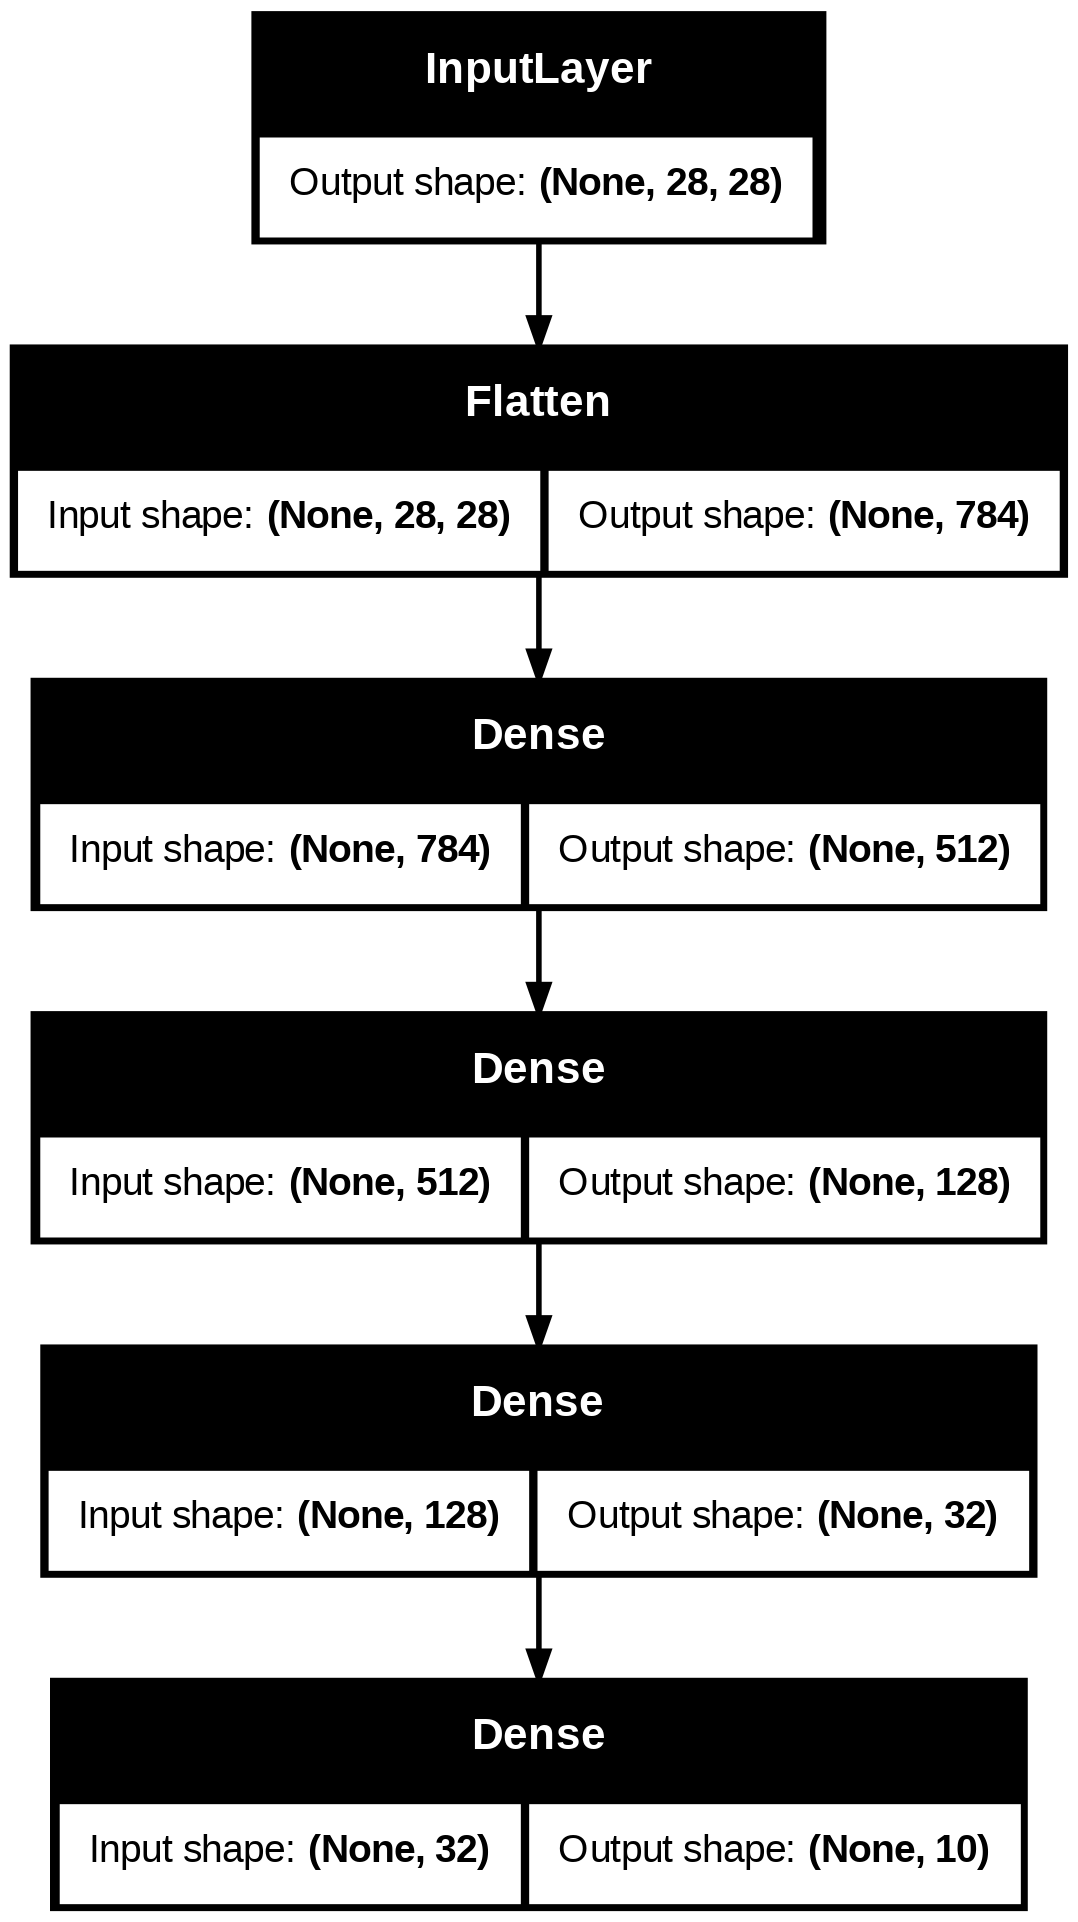

In [111]:
tf.keras.utils.plot_model(model_fm, show_shapes=True)

**CIFAR10**

In [31]:
# Carga de los datos y Normalización
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()

x_train_c10, x_test_c10 = x_train_c10/255, x_test_c10/255
y_train_c10, y_test_c10 = y_train_c10.squeeze(), y_test_c10.squeeze()

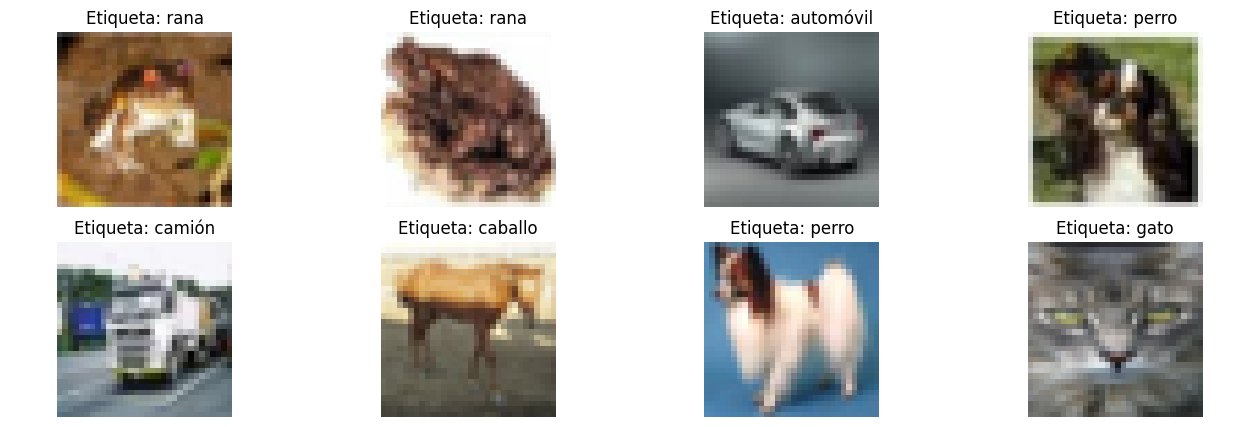

In [32]:
labels2 = ['avión','automóvil','ave','gato','ciervo','perro','rana','caballo','barco','camión']

idxs3 = [0,125,250,500,1000,2000,4000,8000]
plt.figure(figsize=(16,5)), plt.axis('off')
for idx in idxs3:
  plt.subplot(2,4,idxs3.index(idx)+1)
  plt.imshow(x_train_c10[idx]), plt.title(f"Etiqueta: {labels2[y_train_c10[idx]]}"), plt.axis('off')

In [96]:
input_c10 = tf.keras.layers.Input(shape=(32,32,3))
B1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_c10)
B2 = tf.keras.layers.MaxPooling2D((2,2))(B1)
B3 = tf.keras.layers.Flatten()(B2)
B4 = tf.keras.layers.Dense(600, activation='relu')(B3)
B5 = tf.keras.layers.Dense(300, activation='relu')(B4)
output_c10 = tf.keras.layers.Dense(10, activation='softmax')(B5)

model_c10 = tf.keras.Model(inputs=input_c10, outputs=output_c10)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0010848)
model_c10.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'],)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 106s 95ms/step - accuracy: 0.4033 - loss: 1.6476 - val_accuracy: 0.5602 - val_loss: 1.2321
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - accuracy: 0.6045 - loss: 1.1173 - val_accuracy: 0.5753 - val_loss: 1.2092
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 144s 89ms/step - accuracy: 0.6835 - loss: 0.8895 - val_accuracy: 0.6313 - val_loss: 1.0733
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.7554 - loss: 0.6987 - val_accuracy: 0.6133 - val_loss: 1.1830
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.8190 - loss: 0.5162 - val_accuracy: 0.6474 - val_loss: 1.1958
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 99s 90ms/step - accuracy: 0.8796 - loss: 0.3492 - val_accuracy: 0.6332 - val_loss: 1.3162
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.9164 - loss: 0.2525 - val_accuracy: 0.6099 - val_loss: 1.7086
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 140s 87ms/step - accuracy: 0.

In [ ]:
model_c10.fit(x_train_c10, y_train_c10, epochs=10, validation_split=0.3)

In [97]:
y_pred_c10 = model_c10.predict(x_test_c10)

y_pred_c10 = np.argmax(y_pred_c10, axis=1)

accurate = 0
for idx in y_pred_c10:
  if y_test_c10[idx] == y_pred_c10[idx]:
    accurate += 1
print(f"La precisión del modelo es: {np.round(accurate/len(y_pred_c10)*100)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
La precisión del modelo es: 78.0%


In [98]:
# model.save('modelo_c10.keras')

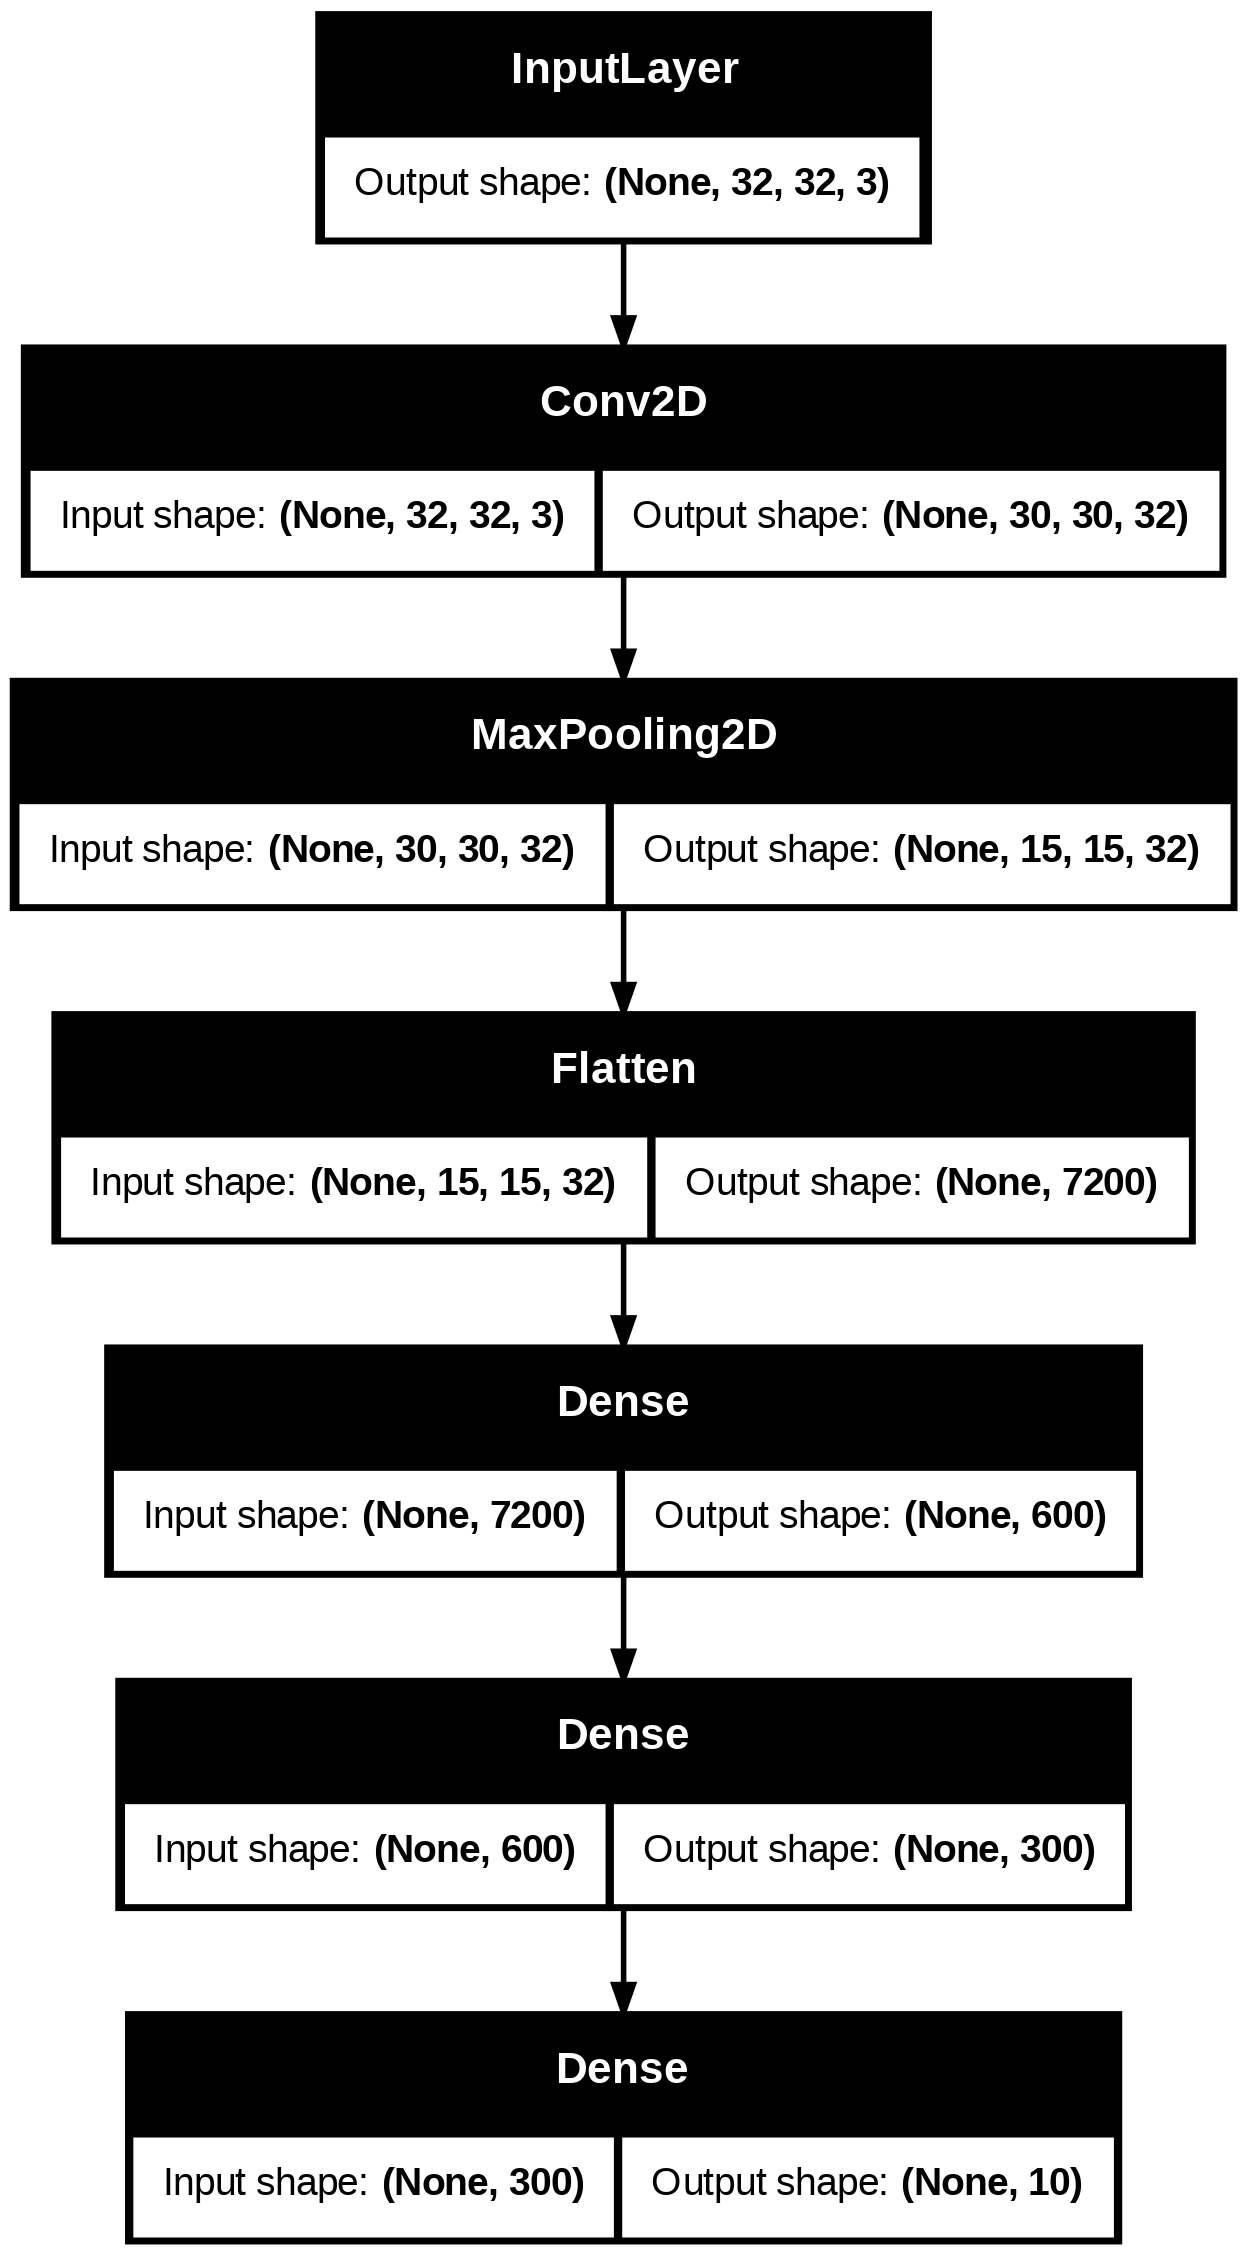

In [99]:
tf.keras.utils.plot_model(model_c10, show_shapes=True)

**CIFAR100**

In [140]:
# Carga de datos
(x_train_c100, y_train_c100), (x_test_c100, y_test_c100) = tf.keras.datasets.cifar100.load_data()

x_train_c100, x_test_c100 = x_train_c100/255, x_test_c100/255
y_train_c100, y_test_c100 = y_train_c100.squeeze(), y_test_c100.squeeze()

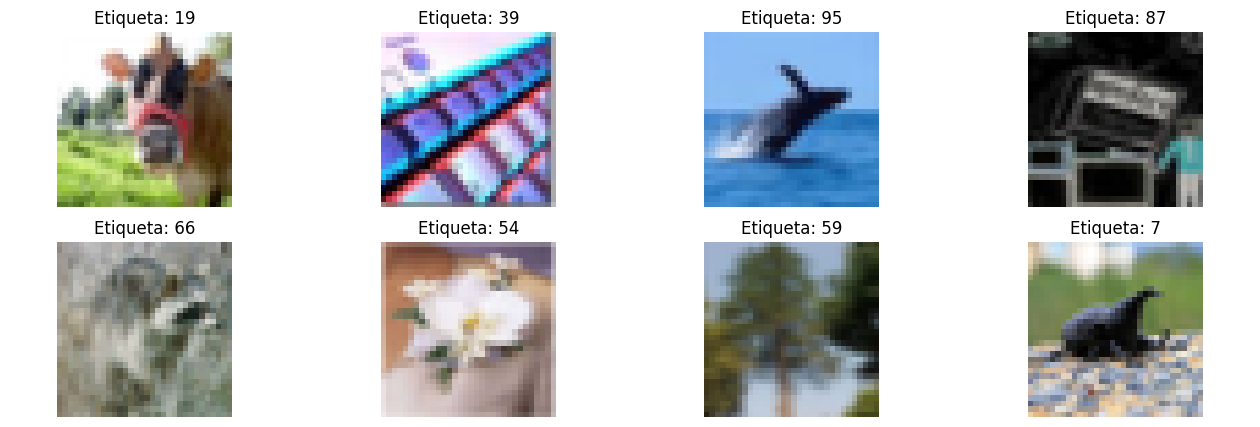

In [147]:
plt.figure(figsize=(16,5)), plt.axis('off')
for idx in idxs3:
  plt.subplot(2,4,idxs3.index(idx)+1)
  plt.imshow(x_train_c100[idx]), plt.title(f"Etiqueta: {y_train_c100[idx]}"), plt.axis('off')

In [175]:
# Cargar diccionario de etiquetas
with open('/content/meta', 'rb') as f:
    mi_diccionario = pickle.load(f)

print(mi_diccionario['fine_label_names'])
# print(mi_diccionario['coarse_label_names'])

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',